# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 267s 2us/step


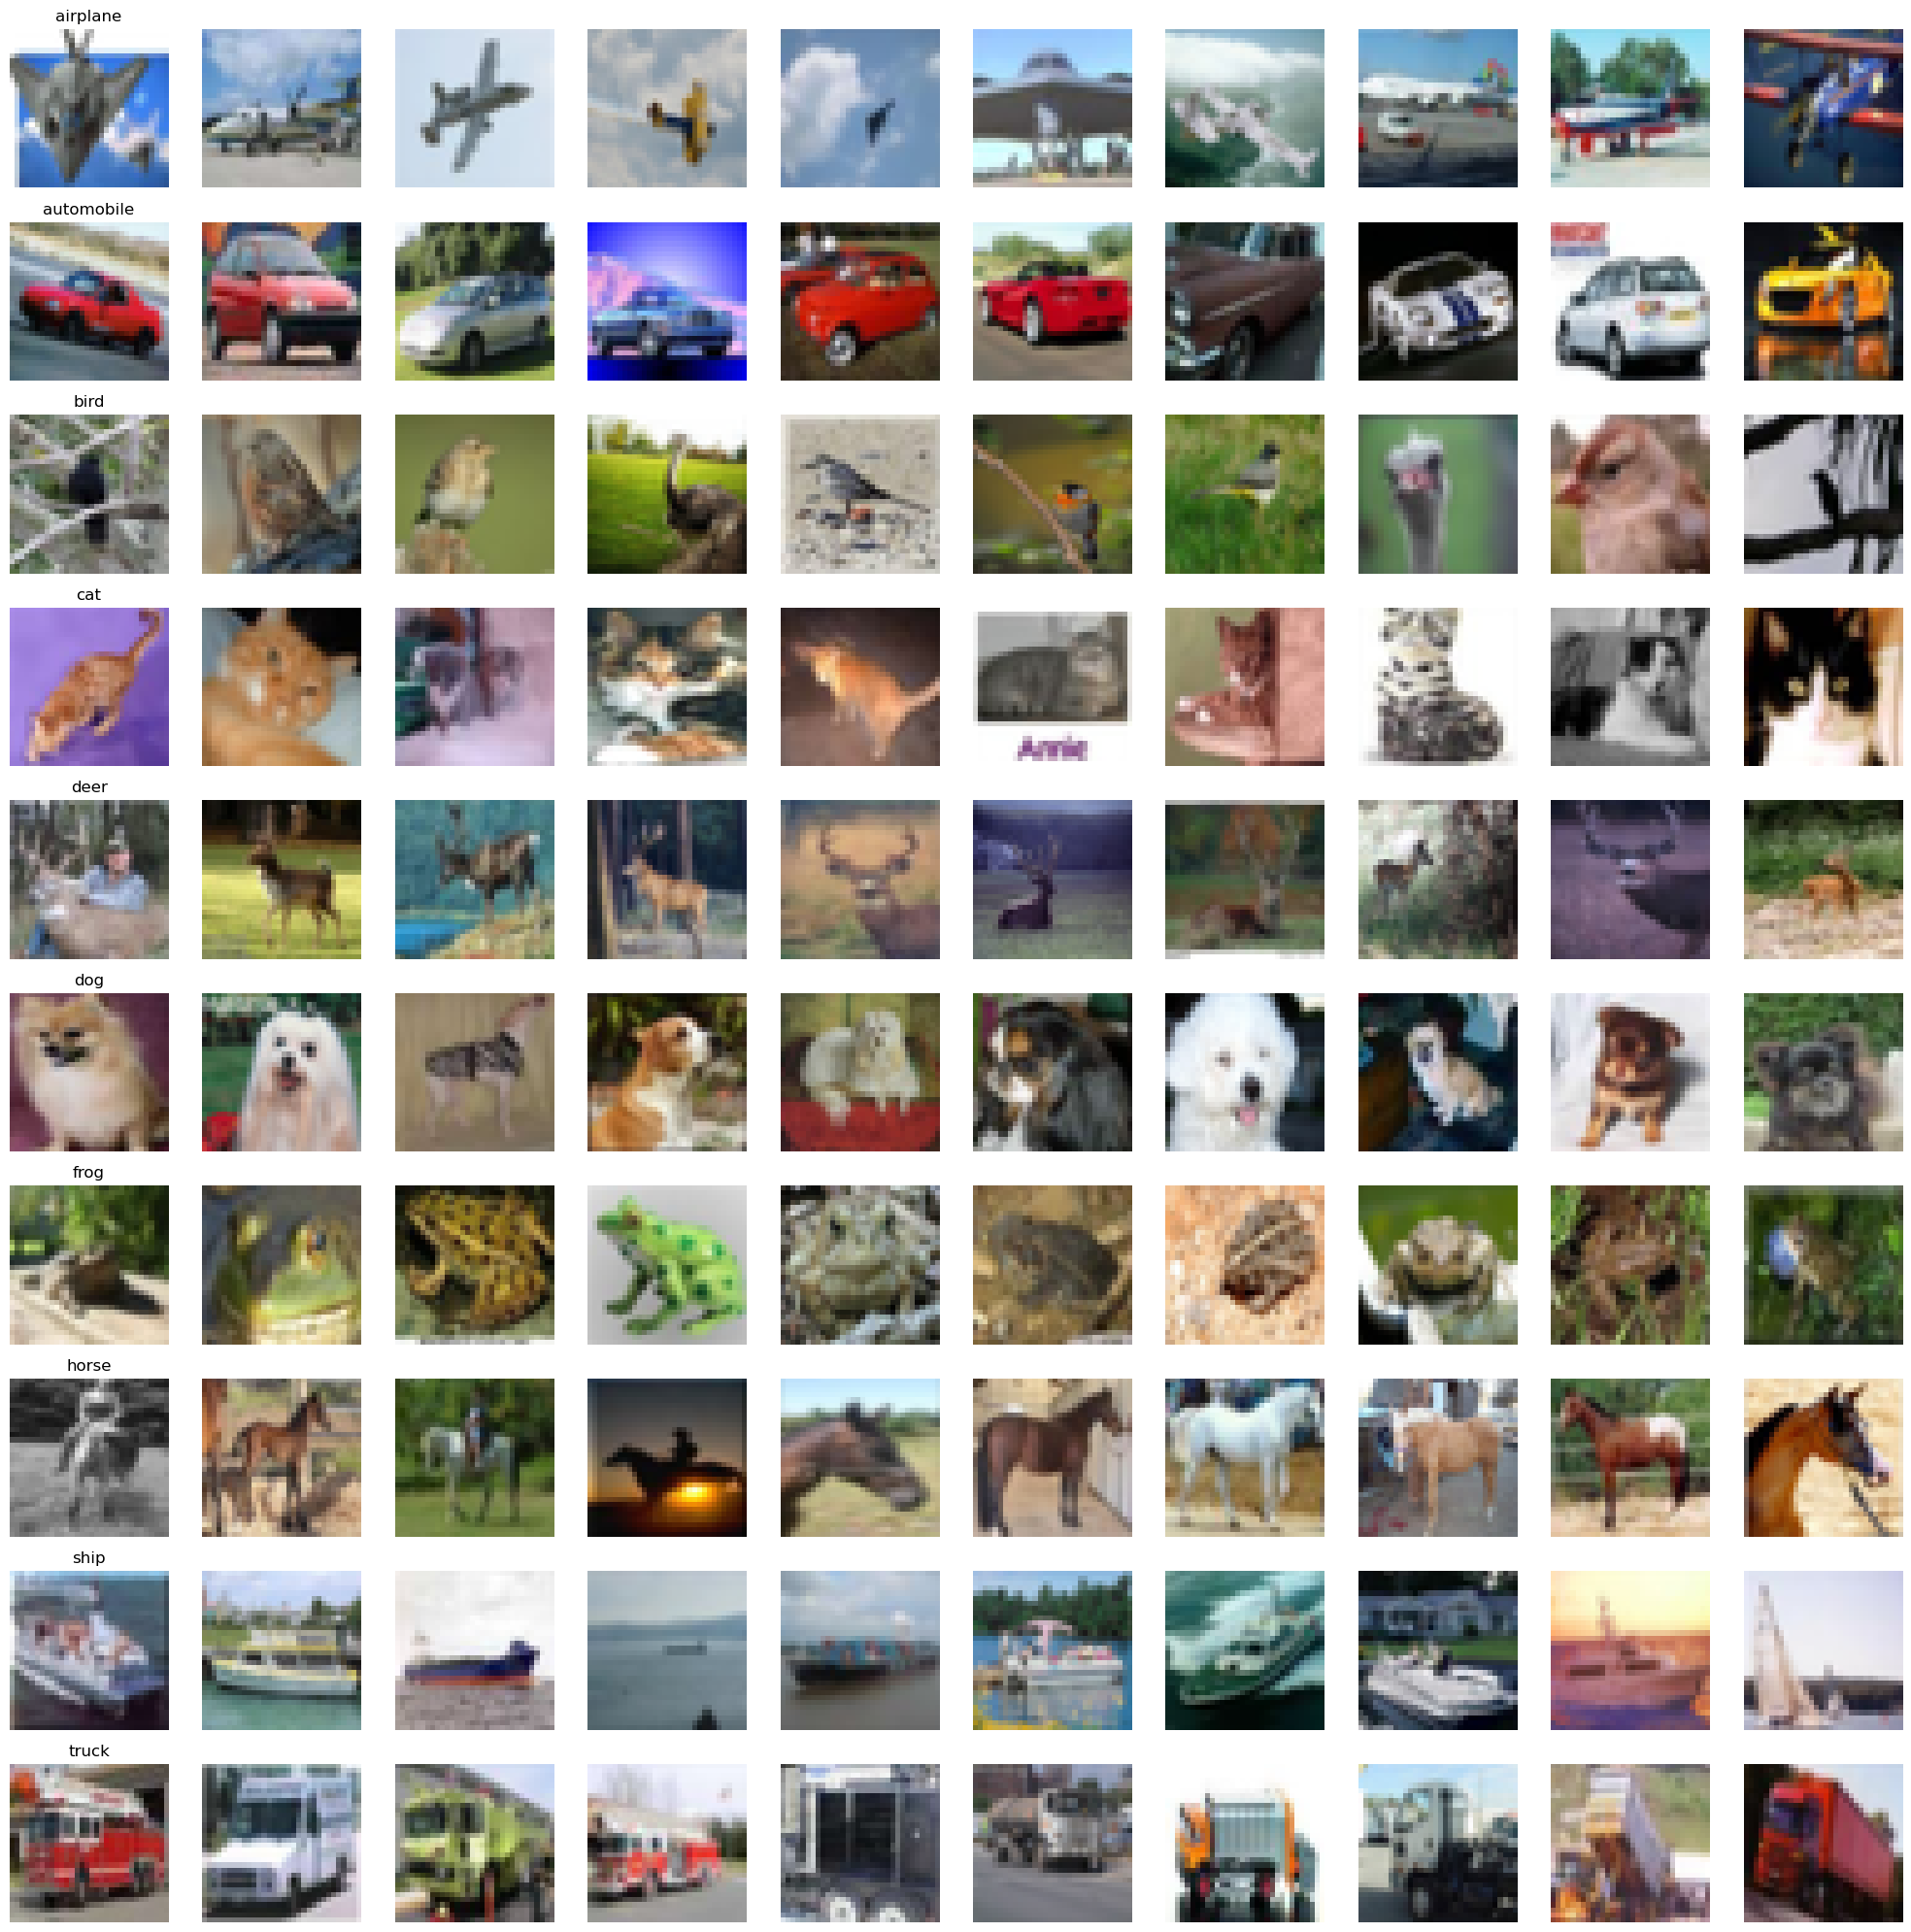

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)

Verifying normalization:
Min value in training set: 0.0
Max value in training set: 1.0


In [2]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 1. Visualize the images
plt.figure(figsize=(20, 20))
for class_idx in range(10):  # For each class
    # Get indices for current class
    indices = np.where(y_train == class_idx)[0]
    # Randomly select 10 images
    selected_indices = np.random.choice(indices, 10, replace=False)
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:  # Add class label for first image in each row
            plt.title(class_names[class_idx])
plt.tight_layout()
plt.show()

# 2. Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# 3. Normalize the images
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Print shapes to verify
print("Training data shape:", x_train_normalized.shape)
print("Training labels shape:", y_train_one_hot.shape)
print("Test data shape:", x_test_normalized.shape)
print("Test labels shape:", y_test_one_hot.shape)

# Verify normalization
print("\nVerifying normalization:")
print("Min value in training set:", x_train_normalized.min())
print("Max value in training set:", x_train_normalized.max())

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # Convolutional front-end
    Conv2D(filters=32,                    # Number of filters
           kernel_size=(3, 3),            # Filter size
           activation='relu',             # ReLU activation
           input_shape=(32, 32, 3),       # Input image dimensions
           padding='same'),               # Padding to maintain dimensions
    
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),      # 2x2 pooling window
    
    # Flatten layer to convert 3D feature maps to 1D vector
    Flatten(),
    
    # Dense hidden layer
    Dense(units=100,                      # 100 units as specified
          activation='relu'),             # ReLU activation
    
    # Output classification layer
    Dense(units=10,                       # 10 classes (CIFAR-10)
          activation='softmax')           # Softmax for multi-class
])

# Display model summary
model.summary()

/Users/rakan/anaconda3/envs/ironhack/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

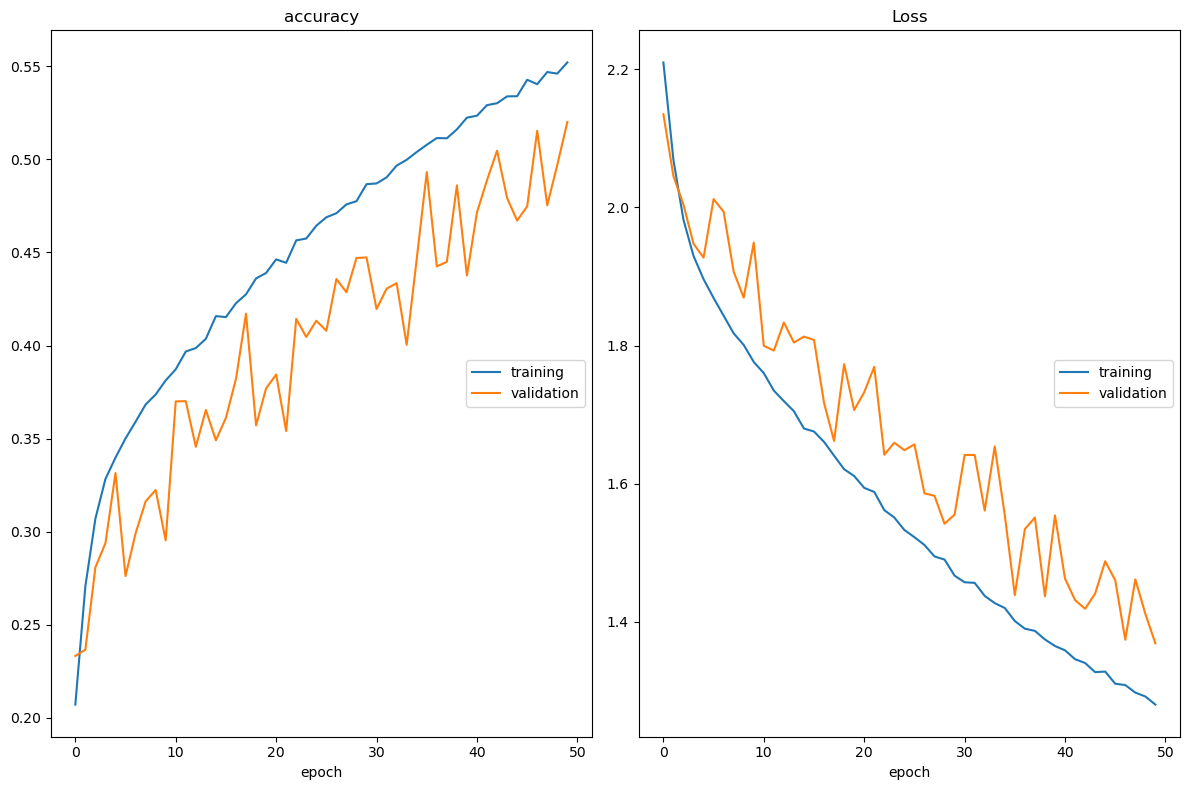

accuracy
	training         	 (min:    0.207, max:    0.552, cur:    0.552)
	validation       	 (min:    0.233, max:    0.520, cur:    0.520)
Loss
	training         	 (min:    1.280, max:    2.210, cur:    1.280)
	validation       	 (min:    1.369, max:    2.135, cur:    1.369)
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5466 - loss: 1.2920 - val_accuracy: 0.5200 - val_loss: 1.3685


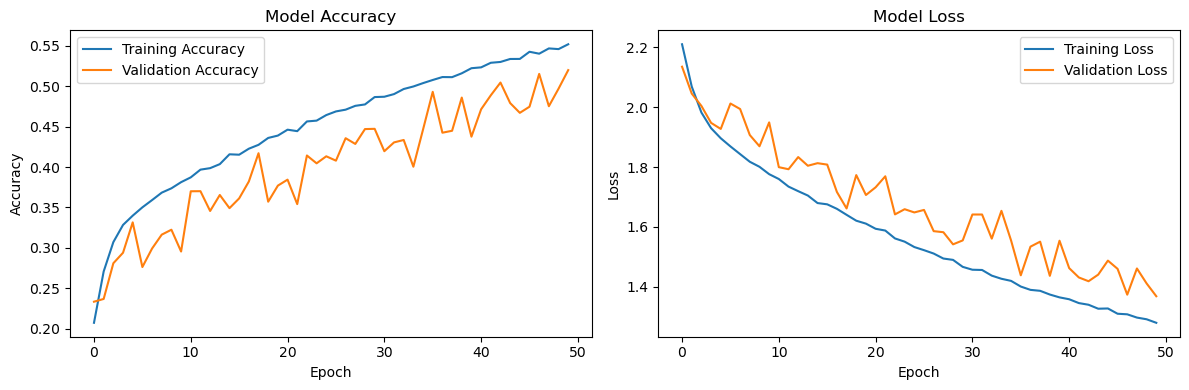

In [5]:
# Your code here :
from tensorflow.keras.optimizers import SGD
from livelossplot import PlotLossesKeras

# Compile the model
model.compile(optimizer=SGD(),                     # Stochastic Gradient Descent
             loss='categorical_crossentropy',      # For multi-class classification
             metrics=['accuracy'])                 # Track accuracy during training

# Train the model
history = model.fit(x_train_normalized,           # Training data
                   y_train_one_hot,               # Training labels
                   epochs=50,                      # Number of epochs
                   batch_size=512,                # Batch size
                   validation_split=0.2,          # Use 20% for validation
                   verbose=1,
                   callbacks=[PlotLossesKeras()])                      # Show progress bar

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


*   Plot the cross entropy loss curve and the accuracy curve

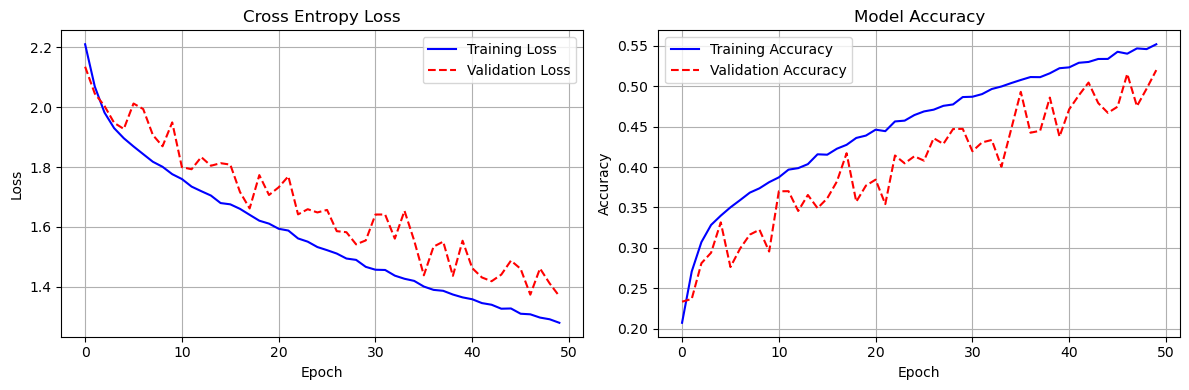

Final Training Loss: 1.2798
Final Validation Loss: 1.3685
Final Training Accuracy: 0.5520
Final Validation Accuracy: 0.5200


In [6]:
# Your code here :
# Plot the training curves
plt.figure(figsize=(12, 4))

# Plot 1: Cross Entropy Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final values
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the deeper VGG-style model
vgg_model = Sequential([
    # First stack of two Conv2D layers
    Conv2D(32, (3, 3), 
           activation='relu',
           padding='same',
           input_shape=(32, 32, 3)),
    
    Conv2D(32, (3, 3),
           activation='relu',
           padding='same'),
    
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer
    Flatten(),
    
    # Dense layer with 128 units
    Dense(128, activation='relu'),
    
    # Output classification layer
    Dense(10, activation='softmax')
])

# Display model summary
vgg_model.summary()

/Users/rakan/anaconda3/envs/ironhack/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

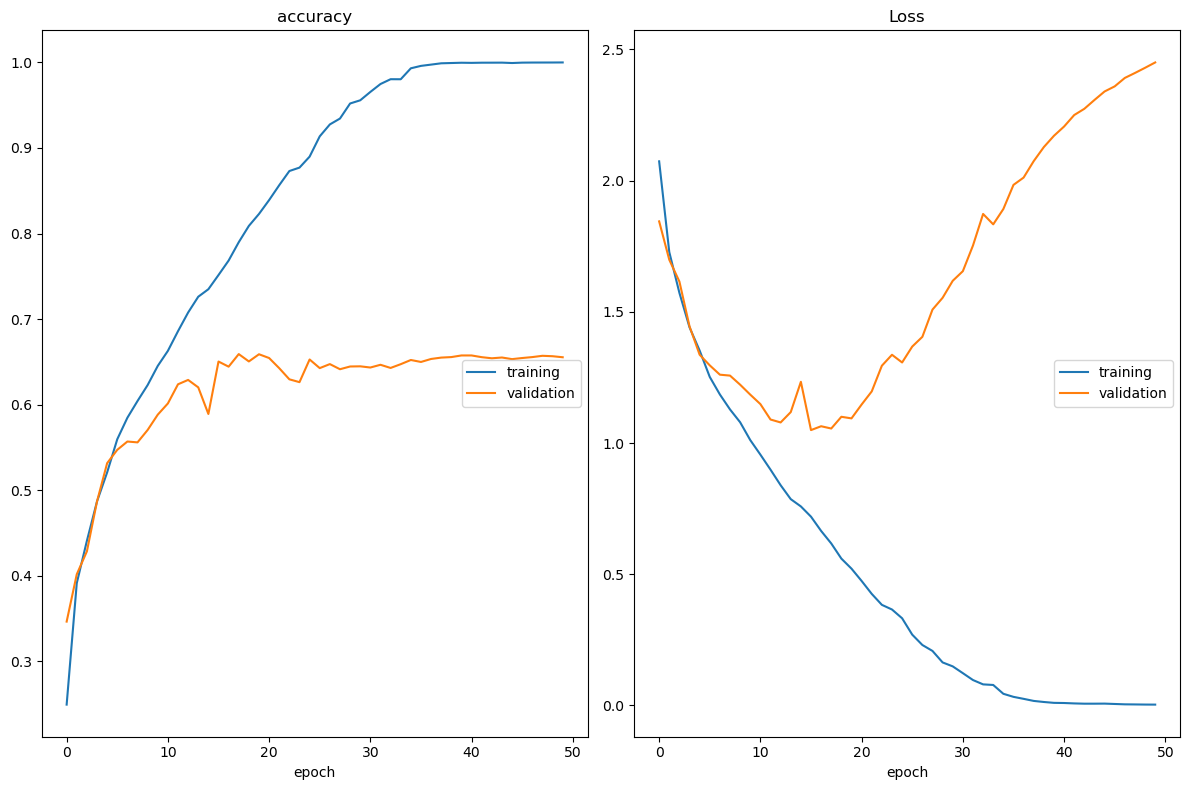

accuracy
	training         	 (min:    0.249, max:    1.000, cur:    1.000)
	validation       	 (min:    0.346, max:    0.659, cur:    0.655)
Loss
	training         	 (min:    0.003, max:    2.073, cur:    0.003)
	validation       	 (min:    1.049, max:    2.450, cur:    2.450)
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.6554 - val_loss: 2.4502


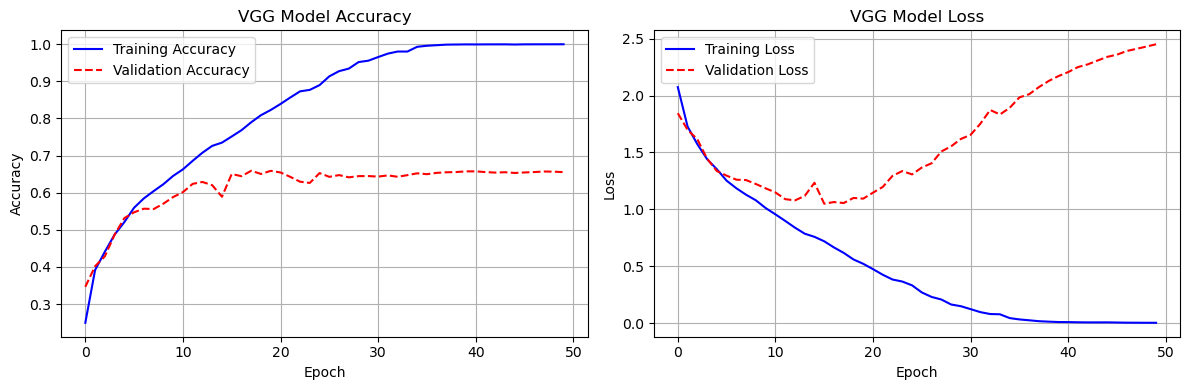

Final Training Loss: 0.0033
Final Validation Loss: 2.4502
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.6554


In [9]:
# Your code here :
from livelossplot import PlotLossesKeras
from tensorflow.keras.optimizers import SGD

# Compile the VGG-style model
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
                  loss='categorical_crossentropy',                  # Multi-class classification
                  metrics=['accuracy'])                             # Track accuracy

# Train the model
vgg_history = vgg_model.fit(x_train_normalized,                     # Normalized training data
                            y_train_one_hot,                        # One-hot encoded labels
                            epochs=50,                              # Number of epochs
                            batch_size=512,                         # Batch size
                            validation_split=0.2,                   # 20% for validation
                            verbose=1,
                            callbacks=[PlotLossesKeras()])          # Show progress

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('VGG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='Training Loss', color='blue')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')
plt.title('VGG Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final values
print(f"Final Training Loss: {vgg_history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {vgg_history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {vgg_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {vgg_history.history['val_accuracy'][-1]:.4f}")


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

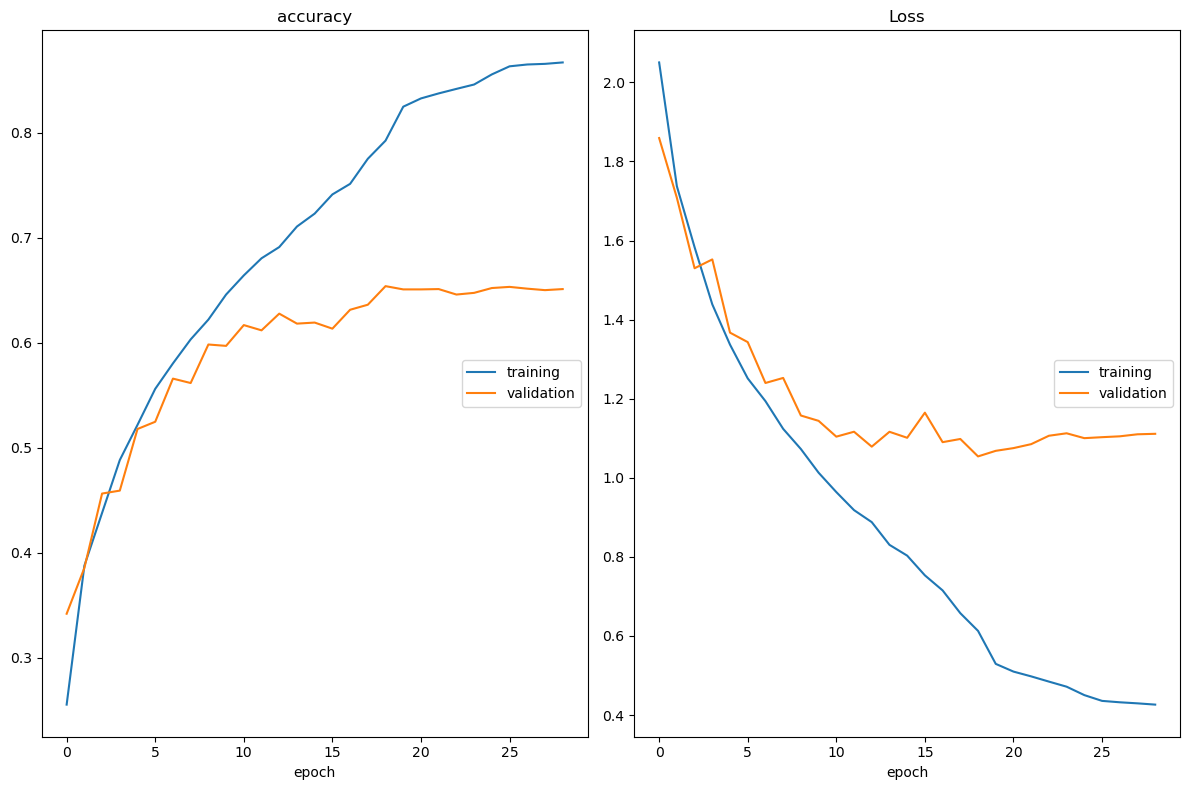

accuracy
	training         	 (min:    0.255, max:    0.867, cur:    0.867)
	validation       	 (min:    0.342, max:    0.654, cur:    0.651)
Loss
	training         	 (min:    0.426, max:    2.050, cur:    0.426)
	validation       	 (min:    1.054, max:    1.859, cur:    1.111)
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.8673 - loss: 0.4278 - val_accuracy: 0.6512 - val_loss: 1.1113 - learning_rate: 4.0000e-04

Simple Model Final Results:
Training Accuracy: 0.7974
Validation Accuracy: 0.6403

VGG Model Final Results:
Training Accuracy: 0.8671
Validation Accuracy: 0.6512


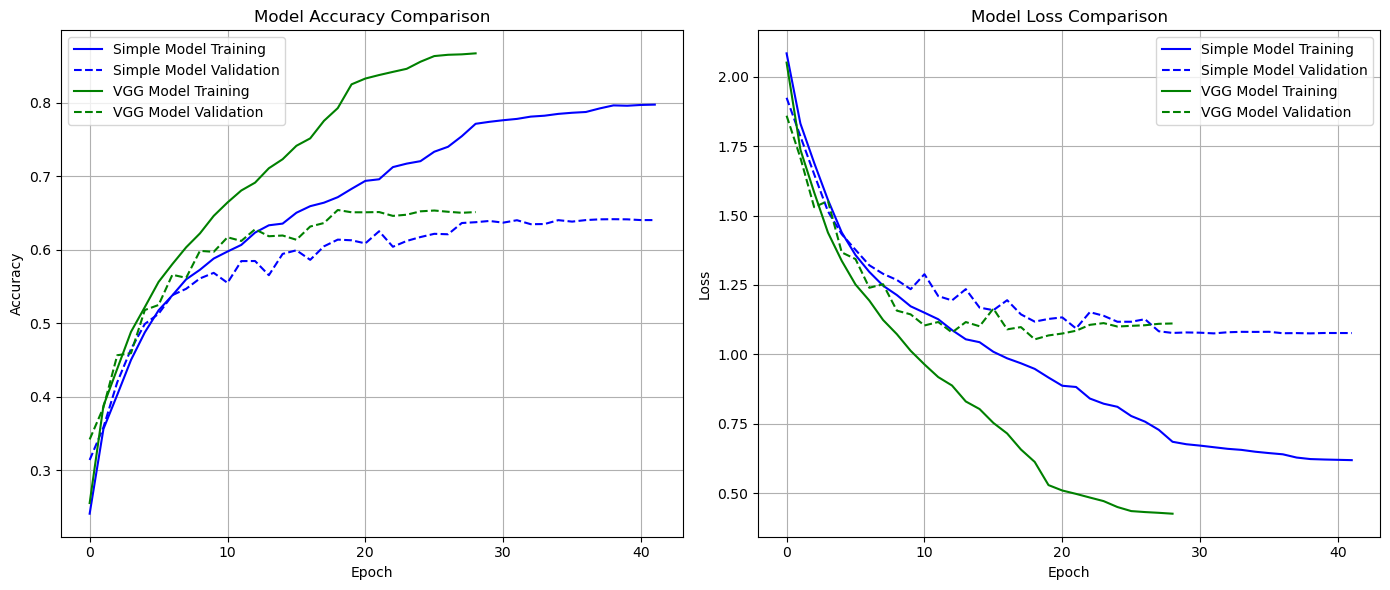

In [13]:
# Import necessary libraries
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import datetime

# Create callback collection
def create_callbacks(model_name):
    callbacks = [
        # Live plotting
        PlotLossesKeras(),
        
        # Early stopping
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        
        # Reduce learning rate
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6
        ),
        
        # Save best model - Updated extension to .keras
        ModelCheckpoint(
            f'best_{model_name}.keras',  # Changed from .h5 to .keras
            monitor='val_accuracy',
            save_best_only=True
        ),
        
        # TensorBoard
        TensorBoard(
            log_dir=f'logs/{model_name}_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
        )
    ]
    return callbacks

# Define and train Simple Model
simple_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

simple_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

simple_history = simple_model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=create_callbacks('simple_model'),
    verbose=1
)

# Define and train VGG Model
vgg_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vgg_history = vgg_model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=create_callbacks('vgg_model'),
    verbose=1
)

# Evaluate and compare models
print("\nSimple Model Final Results:")
print(f"Training Accuracy: {simple_history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {simple_history.history['val_accuracy'][-1]:.4f}")

print("\nVGG Model Final Results:")
print(f"Training Accuracy: {vgg_history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {vgg_history.history['val_accuracy'][-1]:.4f}")

# Plot comparison of both models
plt.figure(figsize=(14, 6))

# Plot 1: Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(simple_history.history['accuracy'], label='Simple Model Training', color='blue')
plt.plot(simple_history.history['val_accuracy'], label='Simple Model Validation', color='blue', linestyle='--')
plt.plot(vgg_history.history['accuracy'], label='VGG Model Training', color='green')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Model Validation', color='green', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(simple_history.history['loss'], label='Simple Model Training', color='blue')
plt.plot(simple_history.history['val_loss'], label='Simple Model Validation', color='blue', linestyle='--')
plt.plot(vgg_history.history['loss'], label='VGG Model Training', color='green')
plt.plot(vgg_history.history['val_loss'], label='VGG Model Validation', color='green', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


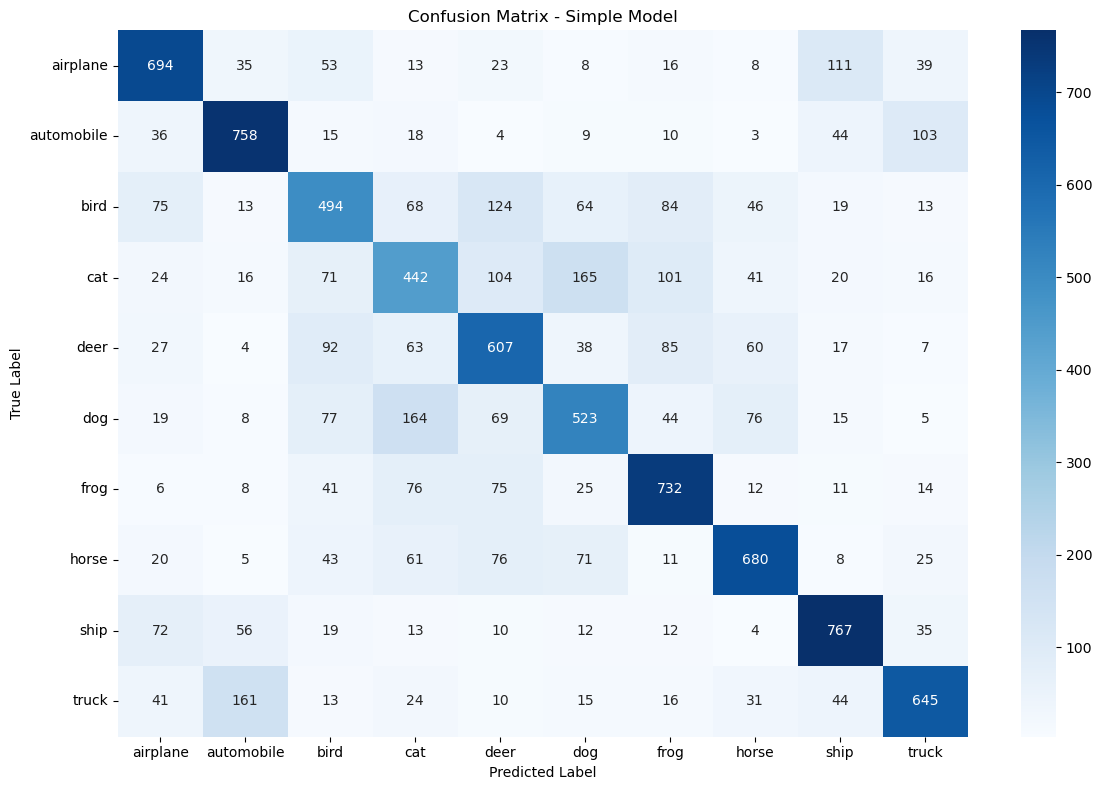


Per-class accuracy for Simple Model:
airplane: 69.40%
automobile: 75.80%
bird: 49.40%
cat: 44.20%
deer: 60.70%
dog: 52.30%
frog: 73.20%
horse: 68.00%
ship: 76.70%
truck: 64.50%


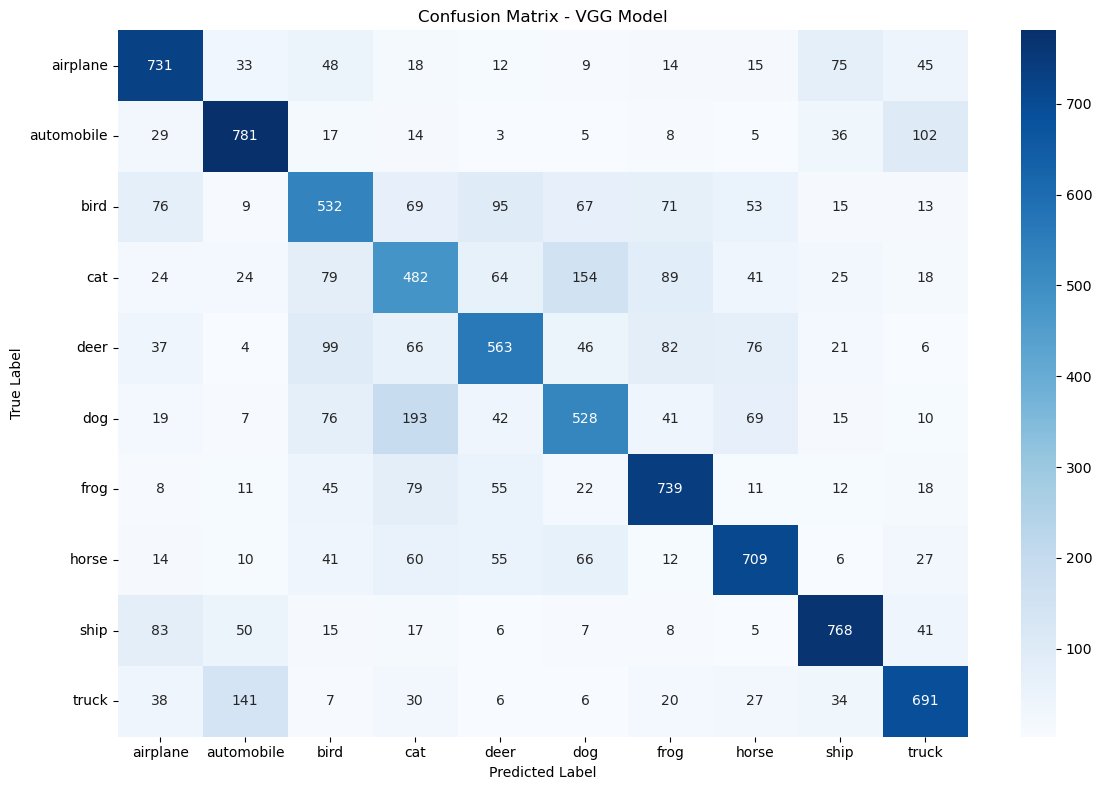


Per-class accuracy for VGG Model:
airplane: 73.10%
automobile: 78.10%
bird: 53.20%
cat: 48.20%
deer: 56.30%
dog: 52.80%
frog: 73.90%
horse: 70.90%
ship: 76.80%
truck: 69.10%

Most Common Confusions in Simple Model:
True cat confused as dog: 16.50% (165 instances)
True dog confused as cat: 16.40% (164 instances)
True truck confused as automobile: 16.10% (161 instances)
True bird confused as deer: 12.40% (124 instances)
True airplane confused as ship: 11.10% (111 instances)

Most Common Confusions in VGG Model:
True dog confused as cat: 19.30% (193 instances)
True cat confused as dog: 15.40% (154 instances)
True truck confused as automobile: 14.10% (141 instances)
True automobile confused as truck: 10.20% (102 instances)
True deer confused as bird: 9.90% (99 instances)


In [14]:
# Your code here :
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Print classification accuracy for each class
    print(f"\nPer-class accuracy for {title}:")
    for i, class_name in enumerate(class_names):
        class_acc = cm[i,i] / np.sum(cm[i]) * 100
        print(f"{class_name}: {class_acc:.2f}%")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions for both models
simple_pred = simple_model.predict(x_test_normalized)
vgg_pred = vgg_model.predict(x_test_normalized)

# Convert predictions and true labels to class indices
y_true = np.argmax(y_test_one_hot, axis=1)
simple_pred_classes = np.argmax(simple_pred, axis=1)
vgg_pred_classes = np.argmax(vgg_pred, axis=1)

# Plot confusion matrices
plot_confusion_matrix(y_true, simple_pred_classes, class_names, "Simple Model")
plot_confusion_matrix(y_true, vgg_pred_classes, class_names, "VGG Model")

# Analyze common confusions
def analyze_confusions(cm, class_names):
    n_classes = len(class_names)
    confusions = []
    
    for i in range(n_classes):
        for j in range(n_classes):
            if i != j and cm[i,j] > 0:
                confusion_rate = cm[i,j] / np.sum(cm[i]) * 100
                if confusion_rate > 5:  # Only show significant confusions (>5%)
                    confusions.append({
                        'true': class_names[i],
                        'predicted': class_names[j],
                        'count': cm[i,j],
                        'rate': confusion_rate
                    })
    
    # Sort by confusion rate
    confusions.sort(key=lambda x: x['rate'], reverse=True)
    return confusions

# Analyze and print common confusions for both models
print("\nMost Common Confusions in Simple Model:")
simple_cm = confusion_matrix(y_true, simple_pred_classes)
simple_confusions = analyze_confusions(simple_cm, class_names)
for conf in simple_confusions[:5]:  # Show top 5 confusions
    print(f"True {conf['true']} confused as {conf['predicted']}: {conf['rate']:.2f}% ({conf['count']} instances)")

print("\nMost Common Confusions in VGG Model:")
vgg_cm = confusion_matrix(y_true, vgg_pred_classes)
vgg_confusions = analyze_confusions(vgg_cm, class_names)
for conf in vgg_confusions[:5]:  # Show top 5 confusions
    print(f"True {conf['true']} confused as {conf['predicted']}: {conf['rate']:.2f}% ({conf['count']} instances)")


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [15]:
# Your code here :
# Evaluate both models on test set
simple_test_loss, simple_test_acc = simple_model.evaluate(x_test_normalized, y_test_one_hot, verbose=0)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(x_test_normalized, y_test_one_hot, verbose=0)

# Print results with formatting
print("\nTest Set Performance:")
print("-" * 50)
print("Simple Model:")
print(f"Test Accuracy: {simple_test_acc:.4f} ({simple_test_acc*100:.2f}%)")
print(f"Test Loss: {simple_test_loss:.4f}")
print("-" * 50)
print("VGG Model:")
print(f"Test Accuracy: {vgg_test_acc:.4f} ({vgg_test_acc*100:.2f}%)")
print(f"Test Loss: {vgg_test_loss:.4f}")
print("-" * 50)

# Compare with training and validation metrics
print("\nComparison across all splits:")
print("-" * 50)
print("Simple Model:")
print(f"Training Accuracy: {simple_history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {simple_history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {simple_test_acc:.4f}")
print("-" * 50)
print("VGG Model:")
print(f"Training Accuracy: {vgg_history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {vgg_history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {vgg_test_acc:.4f}")


Test Set Performance:
--------------------------------------------------
Simple Model:
Test Accuracy: 0.6342 (63.42%)
Test Loss: 1.0701
--------------------------------------------------
VGG Model:
Test Accuracy: 0.6524 (65.24%)
Test Loss: 1.0480
--------------------------------------------------

Comparison across all splits:
--------------------------------------------------
Simple Model:
Training Accuracy: 0.7974
Validation Accuracy: 0.6403
Test Accuracy: 0.6342
--------------------------------------------------
VGG Model:
Training Accuracy: 0.8671
Validation Accuracy: 0.6512
Test Accuracy: 0.6524


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Your code here :

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the complete VGG model
complete_vgg = Sequential([
    # First block: 2 Conv layers with 64 filters + MaxPool
    Conv2D(64, (3, 3), 
           activation='relu', 
           padding='same',
           input_shape=(64, 64, 3)),  # Changed input size to 64x64
    Conv2D(64, (3, 3), 
           activation='relu', 
           padding='same'),
    MaxPooling2D((2, 2)),
    
    # Second block: 2 Conv layers with 128 filters + MaxPool
    Conv2D(128, (3, 3), 
           activation='relu', 
           padding='same'),
    Conv2D(128, (3, 3), 
           activation='relu', 
           padding='same'),
    MaxPooling2D((2, 2)),
    
    # Third block: 2 Conv layers with 256 filters + MaxPool
    Conv2D(256, (3, 3), 
           activation='relu', 
           padding='same'),
    Conv2D(256, (3, 3), 
           activation='relu', 
           padding='same'),
    MaxPooling2D((2, 2)),
    
    # Flatten layer
    Flatten(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display model architecture
complete_vgg.summary()

# Note: Since input size changed to 64x64, we need to resize our images
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Resize training and test images to 64x64
def resize_images(images, size=(64, 64)):
    resized_images = np.zeros((images.shape[0], size[0], size[1], 3))
    for i, img in enumerate(images):
        resized_images[i] = img_to_array(array_to_img(img).resize(size))
    return resized_images

# Resize and normalize images
x_train_resized = resize_images(x_train) / 255.0
x_test_resized = resize_images(x_test) / 255.0

/Users/rakan/anaconda3/envs/ironhack/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

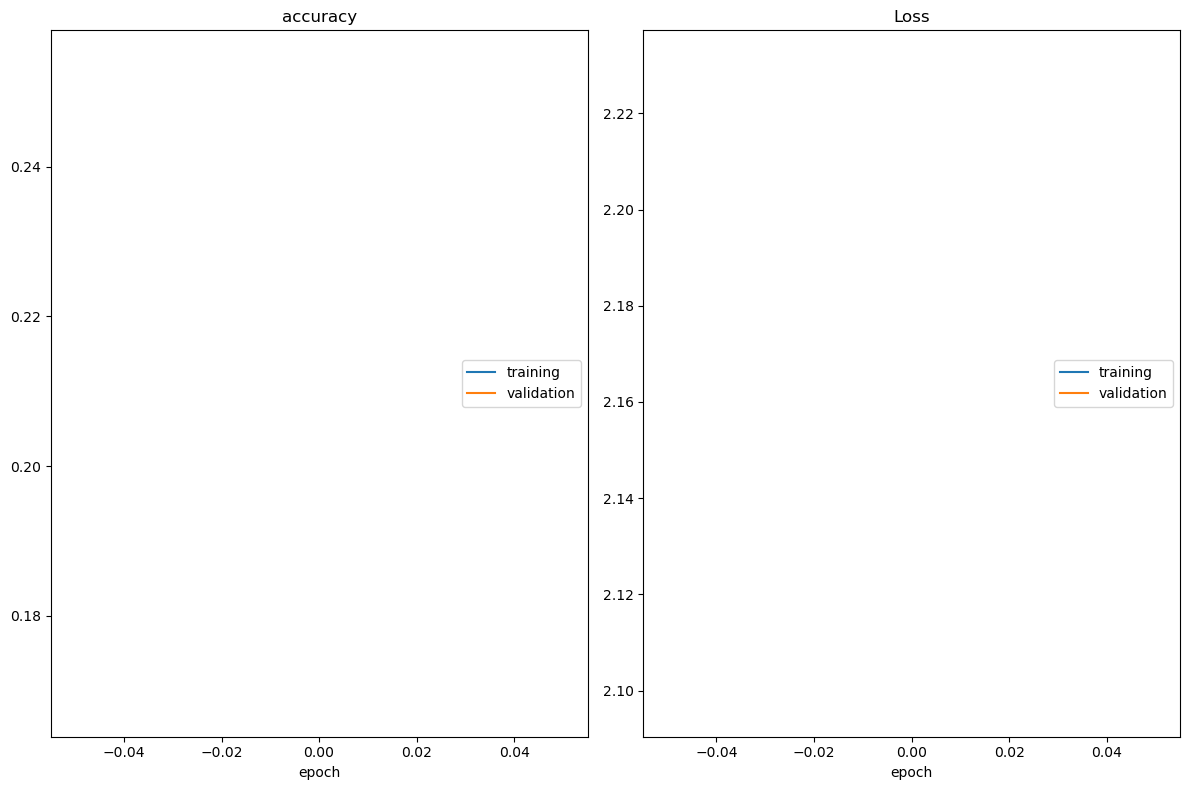

accuracy
	training         	 (min:    0.168, max:    0.168, cur:    0.168)
	validation       	 (min:    0.254, max:    0.254, cur:    0.254)
Loss
	training         	 (min:    2.231, max:    2.231, cur:    2.231)
	validation       	 (min:    2.097, max:    2.097, cur:    2.097)
79/79 ━━━━━━━━━━━━━━━━━━━━ 695s 9s/step - accuracy: 0.1360 - loss: 2.2822 - val_accuracy: 0.2539 - val_loss: 2.0971 - learning_rate: 0.0100
Epoch 2/10
 2/79 ━━━━━━━━━━━━━━━━━━━━ 12:15 10s/step - accuracy: 0.2100 - loss: 2.1832

KeyboardInterrupt: 

In [18]:
# Your code here :
# 1. Compile and train the model
complete_vgg.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
vgg_history = complete_vgg.fit(
    x_train_resized,
    y_train_one_hot,
    epochs=10, # Changed to 10 epochs
    batch_size=512,
    validation_split=0.2,
    callbacks=create_callbacks('complete_vgg'),
    verbose=1
)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
# 2. Get predictions and create confusion matrix
y_pred = complete_vgg.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create and plot confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix - Complete VGG Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 3. Analyze confusions
def analyze_class_performance(cm, class_names):
    print("\nPer-class Performance Analysis:")
    print("-" * 50)
    
    for i, class_name in enumerate(class_names):
        # Calculate metrics
        true_positive = cm[i,i]
        false_positive = np.sum(cm[:,i]) - true_positive
        false_negative = np.sum(cm[i,:]) - true_positive
        
        # Calculate precision and recall
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        
        print(f"\nClass: {class_name}")
        print(f"Accuracy: {true_positive/np.sum(cm[i,:]):.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        
        # Find top confusions
        confusions = [(class_names[j], cm[i,j]) 
                     for j in range(len(class_names)) 
                     if j != i and cm[i,j] > 0]
        confusions.sort(key=lambda x: x[1], reverse=True)
        
        if confusions:
            print("Top confusions:")
            for confused_class, count in confusions[:3]:
                print(f"- Confused as {confused_class}: {count} times")

# Analyze and print results
analyze_class_performance(cm, class_names)

# Print overall performance
print("\nOverall Model Performance:")
print("-" * 50)
test_loss, test_acc = complete_vgg.evaluate(x_test_resized, y_test_one_hot, verbose=0)
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Epoch 1/5
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2441 - loss: 2.0315 - val_accuracy: 0.4926 - val_loss: 1.3627 - learning_rate: 0.0100
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5246 - loss: 1.3189 - val_accuracy: 0.6132 - val_loss: 1.0937 - learning_rate: 0.0100
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6481 - loss: 0.9969 - val_accuracy: 0.7001 - val_loss: 0.8471 - learning_rate: 0.0100
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7385 - loss: 0.7470 - val_accuracy: 0.7283 - val_loss: 0.7779 - learning_rate: 0.0100
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7994 - loss: 0.5712 - val_accuracy: 0.7393 - val_loss: 0.7621 - learning_rate: 0.0100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7344 - loss: 0.7810

Test Accuracy: 0.7304 (73.04%)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
- Activation functions are used to introduce non-linearity into the model, allowing it to learn more complex relationships in the data.
- Without activation functions, the model would be a linear combination of its inputs, which would severely limit its ability to model non-linear relationships.


_ 

2 - Key Differences between sigmoid and softmax:
- Sigmoid is used for binary classification problems, where the output is a single probability value between 0 and 1.
- Softmax is used for multi-class classification problems, where the output is a probability distribution over multiple classes.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
- Categorical crossentropy is used for multi-class classification problems, where the output is a probability distribution over multiple classes.
- Binary crossentropy is used for binary classification problems, where the output is a single probability value between 0 and 1.

_
